1) Run SVM algorithm on the loan dataset

2) Covert these two R codes (uploaded in the Files section) into Python and inspect the number of support vectors for three different values of the cost function: Number of Support Vectors 2.R and Number of Support Vectors.R

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
import seaborn as sns 

In [3]:
import os

os.getcwd()

'/Users/shubhamgoyal/Downloads/DataSciece19098'

In [4]:
ls

Assignment1_ShubhamGoyal_Sec11.ipynb   ShubhamGoyal_Assignment3_Sec11.ipynb
Assignment2_ShubhamGoyal_Sec11.ipynb   Statistics and Probability - v5.pdf
Assignment2_ShubhamGoyal_Sec11.xls     boston housing.xls
Assignment4_ShubhamGoyal_Sec11.ipynb   circles.R
Assignment5_ShubhamGoyal.ipynb         dt_entropy.png
Chemical Process.xlsx                  dt_gini.png
DSAEM-19098/                           loan.xlsx
ExamData.xlsx                          one.png
Exercise 10.05.ipynb                   output/
Machine Learning v4.pdf                play.xlsx
Python Coding Exercises.pdf            prudential-life-insurance-assessment/
ShubhamGoyal_Assignment3_Sec11(1).pdf


In [5]:
loan_df= pd.read_excel('loan.xlsx')
loan_df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [6]:
#one hot encoding product_info_2 var as it is string categorical variable

from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
col_enc = ['Res_status', 'Liab_ref', 'Job_status', 'Acc_ref', 'Telephone', 'Sex', 'Occupation']

# Use the one-hot encoder to transform the categorical data columns. 
loan_df_enc = pd.DataFrame(OH_encoder.fit_transform(loan_df[col_enc]))

#reassigning the original index.
loan_df_enc.index = loan_df_enc.index

# Addings columns as per the encoding 
loan_df_enc.columns = OH_encoder.get_feature_names(col_enc)

# Create dataframes that only include the numerical features/columns (these will be concatenated with the one-hot encoded dataframes).
loan_df_no_enc = loan_df.drop(col_enc, axis=1)

# Concatenate the one-hot encoded columns with the existing numerical features/columns.
loan_df_upd = pd.concat([loan_df_no_enc, loan_df_enc], axis=1)
loan_df_upd.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Decision,Res_status_owner,Res_status_rent,Liab_ref_f,...,Occupation_executive,Occupation_guard_etc,Occupation_labourer,Occupation_manager,Occupation_office_st,Occupation_productio,Occupation_professio,Occupation_sales,Occupation_semi_pro,Occupation_unemploye
0,50.750000,0.585,0,0,145,0,reject,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,19.670000,10.000,0,0,140,0,reject,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52.830002,15.000,5,14,0,2200,accept,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22.670000,2.540,2,0,0,0,accept,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29.250000,13.000,0,0,228,0,reject,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

loan_df_upd['Decision_cat'] = labelencoder.fit_transform(loan_df_upd['Decision'])

loan_df_upd.drop('Decision',inplace=True,axis=1)

loan_df_upd.head()


,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Res_status_owner,Res_status_rent,Liab_ref_f,Liab_ref_t,...,Occupation_guard_etc,Occupation_labourer,Occupation_manager,Occupation_office_st,Occupation_productio,Occupation_professio,Occupation_sales,Occupation_semi_pro,Occupation_unemploye,Decision_cat
0,50.750000,0.585,0,0,145,0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,19.670000,10.000,0,0,140,0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,52.830002,15.000,5,14,0,2200,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,22.670000,2.540,2,0,0,0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,29.250000,13.000,0,0,228,0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [10]:
# Feature scaling to normalise the data

from sklearn.preprocessing import normalize
scale_cols=['Age','Time_at_address','Time_employed','Time_bank','Home_Expn','Balance']

loan_df_upd[scale_cols]=normalize(loan_df_upd[scale_cols])
loan_df_upd.head()


,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Res_status_owner,Res_status_rent,Liab_ref_f,Liab_ref_t,...,Occupation_guard_etc,Occupation_labourer,Occupation_manager,Occupation_office_st,Occupation_productio,Occupation_professio,Occupation_sales,Occupation_semi_pro,Occupation_unemploye,Decision_cat
0,0.330348,0.003808,0.000000,0.000000,0.943852,0.000000,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,0.138787,0.070558,0.000000,0.000000,0.987806,0.000000,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.024006,0.006816,0.002272,0.006362,0.000000,0.999666,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.989984,0.110920,0.087339,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.127044,0.056464,0.000000,0.000000,0.990289,0.000000,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [253]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC() 

X=loan_df_upd.drop('Decision_cat',axis=1)
y=loan_df_upd['Decision_cat']


In [261]:
X.shape

(429, 35)

In [268]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 



# declare parameters for hyperparameter tuning
parameters = [ {'C':[0.1,1, 10], 'kernel':['linear']},
               {'C':[0.1,1, 10], 'kernel':['rbf'], 'gamma':[0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[0.1,1, 10], 'kernel':['poly'], 'degree': [0,2,3,4] ,'gamma':[0,0.01,0.02,0.03,0.04,0.05]},
               {'C':[0.1,1, 10], 'kernel':['sigmoid']}
              
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv=5,
                           verbose=3)


grid_search.fit(X, y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.663 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.744 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.733 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.733 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.706 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.686 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.791 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.767 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.721 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=0.682 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.721 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linea

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10],
                          'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10], 'degree': [0, 2, 3, 4],
                          'gamma': [0, 0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']},
                         {'C': [0.1, 1, 10], 'kernel': ['sigmoid']}],
             scoring='accuracy', verbose=3)

In [260]:
# examine the best model


# best score achieved during the GridSearchCV (Takes the mean of all the CV folds) - Model w/ Linear kernel comes out on top
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.7295


Parameters that give the best results : 

 {'C': 1, 'kernel': 'linear'}


Estimator that was chosen by the search : 

 SVC(C=1, kernel='linear')


In [269]:
svc_grid_search=SVC(C=1,kernel='linear')
svc_grid_search.fit(X,y)

y_pred_gs=svc_grid_search.predict(X)

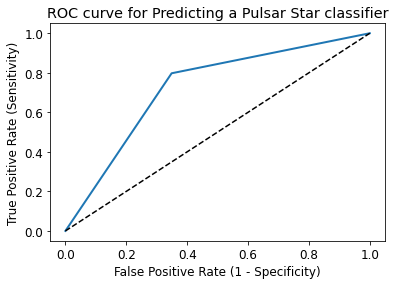

In [270]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, y_pred_gs)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

### Inference:

- We can gather from the above exercise of grid search that linear model with cost set at 1 is best performing model among other parameter settings <br>
- Interesting part to note is there are different models performing better for certain splits of data, but when taken mean accross all splits, they underperform <br>


## Second part - converting the two provided R codes to study support vectors

1) Number of Support Vectors.R

In [43]:
np.random.seed(10)
X=np.random.normal(size=1000)
Y=np.random.normal(size=1000)
Z=(X+Y)>0
d={'X':X,'Y':Y,'Z':Z}
ys=np.repeat(np.array([1,-1]),[1000,1000],axis=0)
ys_color= np.repeat(np.array(['red','green']),[1000,1000],axis=0)

data=pd.DataFrame(d)
data.head()

,X,Y,Z
0,1.331587,1.513252,True
1,0.715279,-0.142334,True
2,-1.545400,-0.139420,False
3,-0.008384,1.175508,True
4,0.621336,1.183789,True


In [246]:
# default value of C=1.0
# linear_svc = SVC(kernel = "linear")

X=data.drop('Z',axis=1)
y=data['Z']

# linear_svc.fit(X,y)


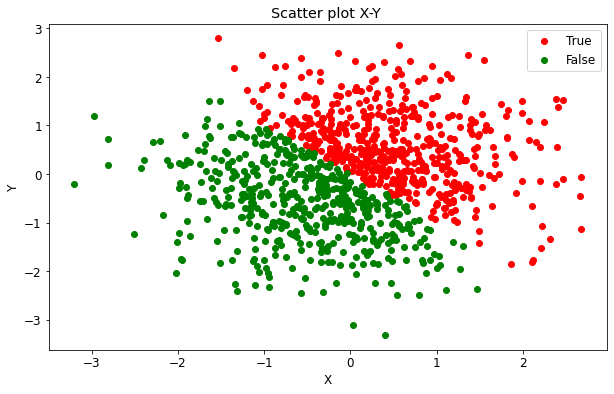

In [195]:
def plot_data(title):    
    plt.figure(figsize=(10,6))
    plt.scatter(data.X[data.Z==True], data.Y[data.Z==True], color='red', label= 'True')
    plt.scatter(data.X[data.Z==False], data.Y[data.Z==False], color='green', label= 'False')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.legend()

plot_data(title='Scatter plot X-Y ')

In [196]:
def plot_support_vector(classifier):
   
    clf =classifier
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k') 

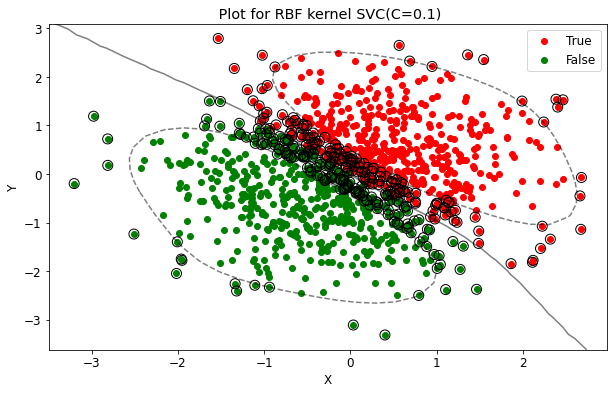

In [206]:
clf=SVC(kernel='rbf',C=0.1)
clf.fit(X.values,y)

plot_data(' Plot for RBF kernel ' + str(clf))
plot_support_vector(clf)

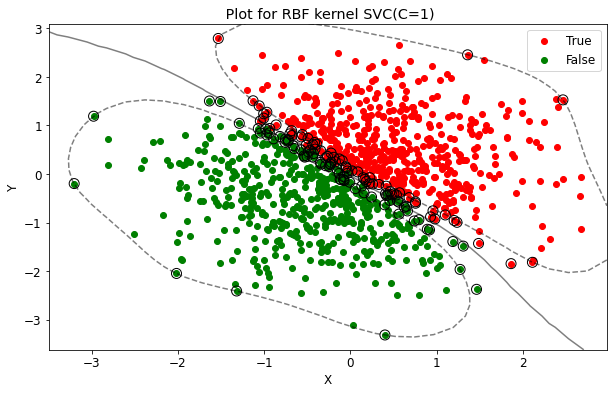

In [208]:
clf=SVC(kernel='rbf',C=1)
clf.fit(X.values,y)

plot_data(' Plot for RBF kernel ' + str(clf))
plot_support_vector(clf)

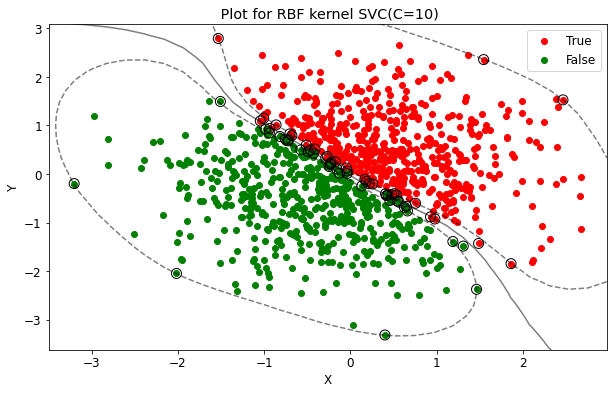

In [209]:
clf=SVC(kernel='rbf',C=10)
clf.fit(X.values,y)

plot_data(' Plot for RBF kernel ' + str(clf))
plot_support_vector(clf)

### Inference:

- from the above charts, we can observe the differentiation in the hyperplanes based on the increase in cost<br>
- the model starts tries to improve the fit <br>


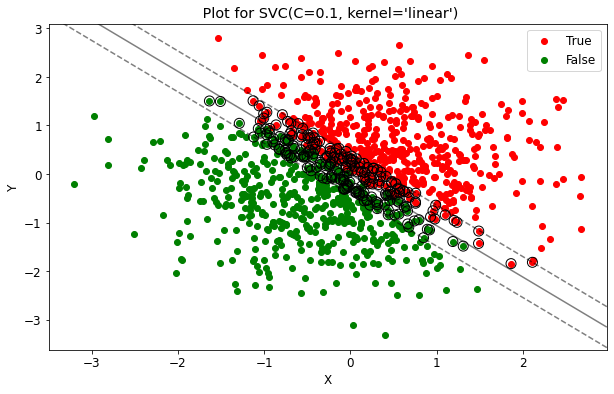

In [210]:
clf=SVC(kernel='linear',C=0.1)
clf.fit(X.values,y)

plot_data(' Plot for ' + str(clf))
plot_support_vector(clf)

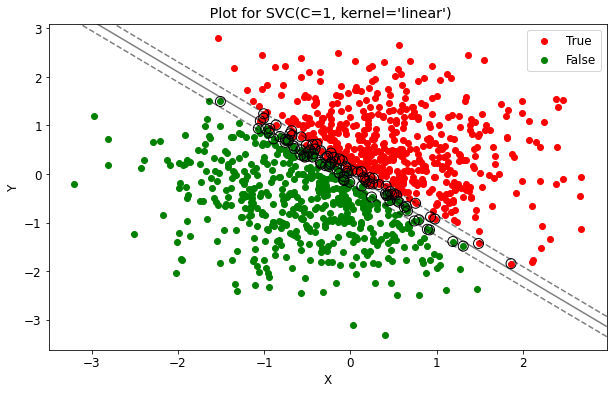

In [211]:
clf=SVC(kernel='linear',C=1)
clf.fit(X.values,y)

plot_data(' Plot for ' + str(clf))
plot_support_vector(clf)

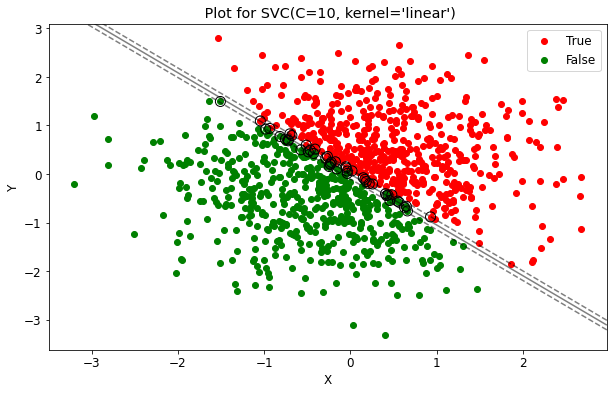

In [212]:
clf=SVC(kernel='linear',C=10)
clf.fit(X.values,y)

plot_data(' Plot for ' + str(clf))
plot_support_vector(clf)

### Inference:

- from the above charts, we can observe as we increase the cost the margins in between the support vectors keeps on reducing 

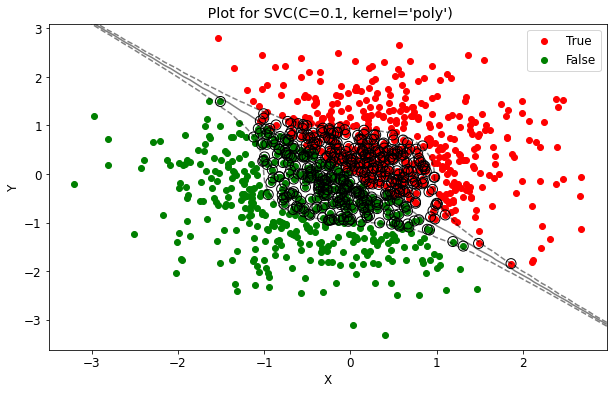

In [213]:
clf=SVC(kernel='poly',C=0.1)
clf.fit(X.values,y)

plot_data(' Plot for ' + str(clf))
plot_support_vector(clf)

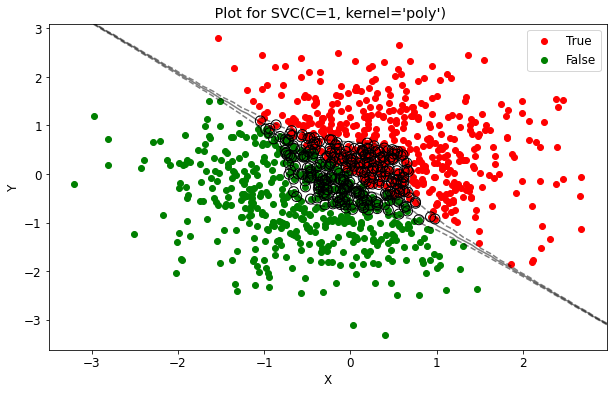

In [214]:
clf=SVC(kernel='poly',C=1)
clf.fit(X.values,y)

plot_data(' Plot for ' + str(clf))
plot_support_vector(clf)

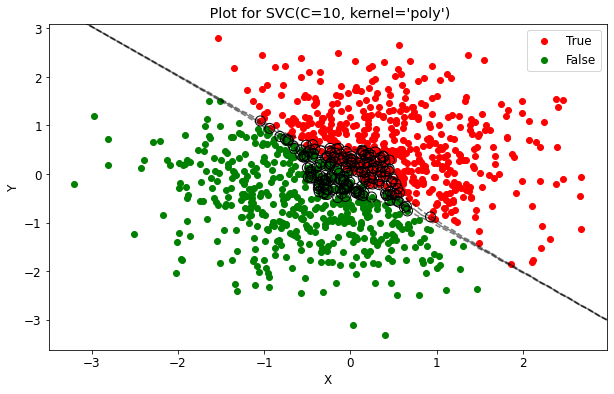

In [247]:
clf=SVC(kernel='poly',C=10)
clf.fit(X.values,y)

plot_data(' Plot for ' + str(clf))
plot_support_vector(clf)

### Inference:

- Similar to linear kernel, in polynomial kernel as well the margin in support vectors keep on reducing with increased cost


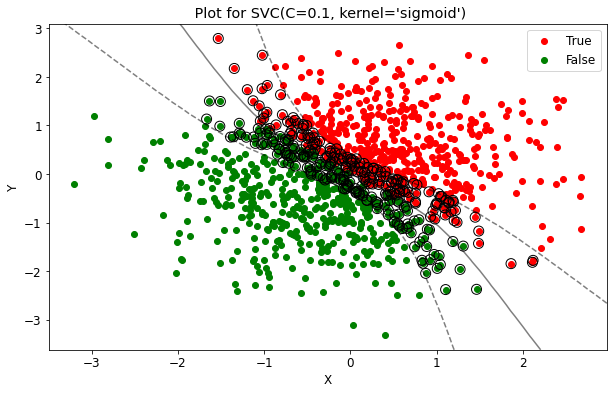

In [248]:
clf=SVC(kernel='sigmoid',C=0.1)
clf.fit(X.values,y)

plot_data(' Plot for ' + str(clf))
plot_support_vector(clf)

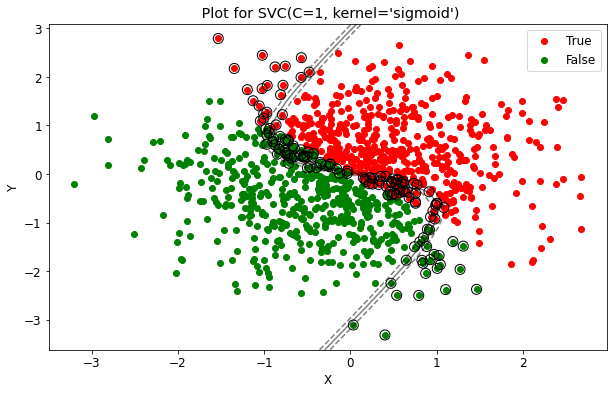

In [249]:
clf=SVC(kernel='sigmoid',C=1)
clf.fit(X.values,y)

plot_data(' Plot for ' + str(clf))
plot_support_vector(clf)

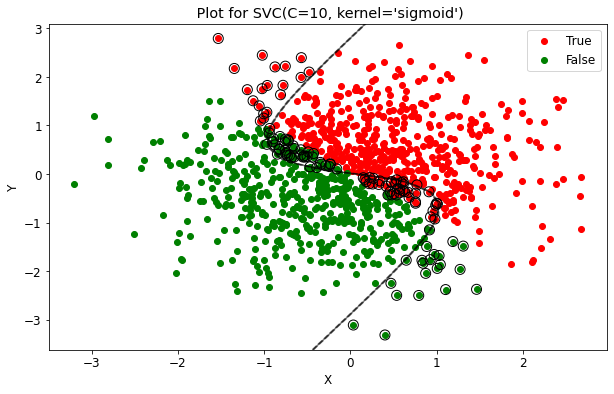

In [250]:
clf=SVC(kernel='sigmoid',C=10)
clf.fit(X.values,y)

plot_data(' Plot for ' + str(clf))
plot_support_vector(clf)

### Inference:

- In sigmoid kernel, we can observe difference in hyperplane pattern with increased cost <br>
- The model is trying to fit as much data points possible, but its hard to visualize the complete shape in 2D

2) Code for Number of Support Vectors 2.R 

In [292]:
x1 = [.5,1,1,2,3,3.5,1,3.5,4,5,5.5,6]
x2 = [3.5,1,2.5,2,4,1.2,5.8,3,4,5,4,1]
ys=np.repeat(np.array([1,-1]),[6,6],axis=0)
d_2={'x1':x1,'x2':x2,'type':ys}
data_2=pd.DataFrame(d_2)
data_2

,x1,x2,type
0,0.5,3.5,1
1,1.0,1.0,1
2,1.0,2.5,1
3,2.0,2.0,1
4,3.0,4.0,1
5,3.5,1.2,1
6,1.0,5.8,-1
7,3.5,3.0,-1
8,4.0,4.0,-1
9,5.0,5.0,-1


In [293]:
X=data_2[['x1','x2']]
y=data_2[['type']]

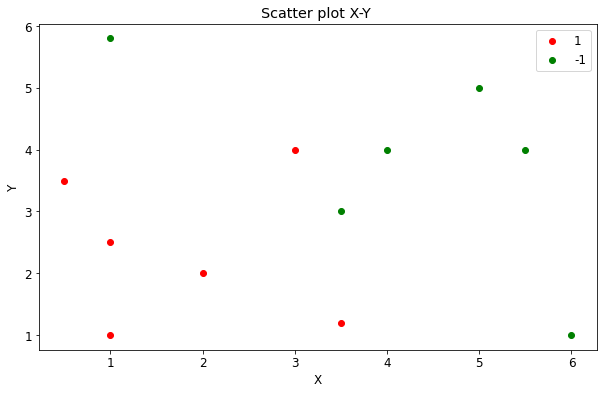

In [294]:
def plot_data_2(title):    
    plt.figure(figsize=(10,6))
    plt.scatter(data_2.x1[data_2.type==1], data_2.x2[data_2.type==1], color='red', label= '1')
    plt.scatter(data_2.x1[data_2.type==-1], data_2.x2[data_2.type==-1], color='green', label= '-1')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.legend()

plot_data_2(title='Scatter plot X-Y ')

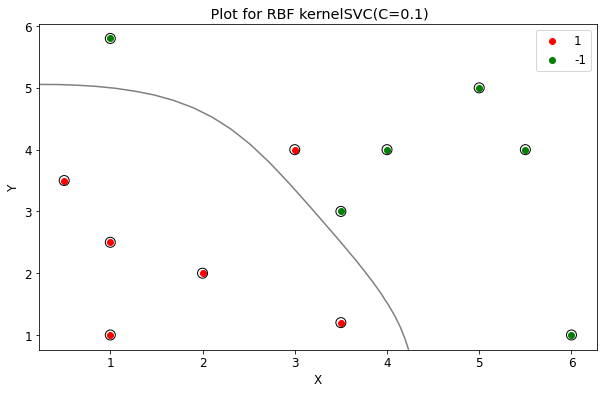

In [297]:
clf=SVC(kernel='rbf',C=0.1)
clf.fit(X.values,y.values.ravel())

plot_data_2(' Plot for RBF kernel' + str(clf))
plot_support_vector(clf)

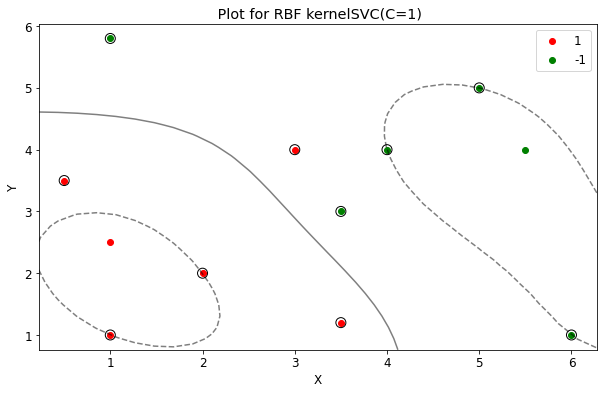

In [298]:
clf=SVC(kernel='rbf',C=1)
clf.fit(X.values,y.values.ravel())

plot_data_2(' Plot for RBF kernel' + str(clf))
plot_support_vector(clf)

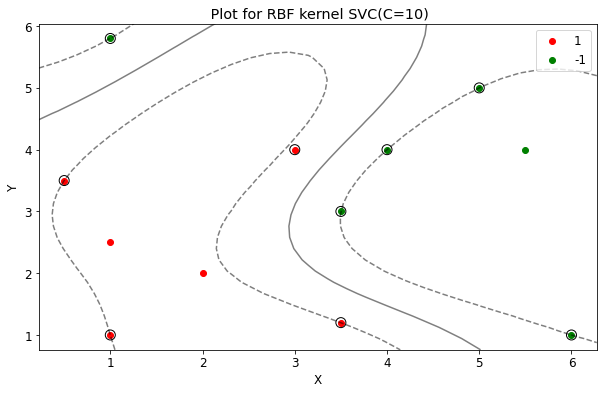

In [299]:
clf=SVC(kernel='rbf',C=10)
clf.fit(X.values,y.values.ravel())

plot_data_2(' Plot for RBF kernel ' + str(clf))
plot_support_vector(clf)

### Inference:

- In above charts, we can observe increase of complexity of hyperplane function with increased cost <br>
- The model is trying to fit as much data points possible

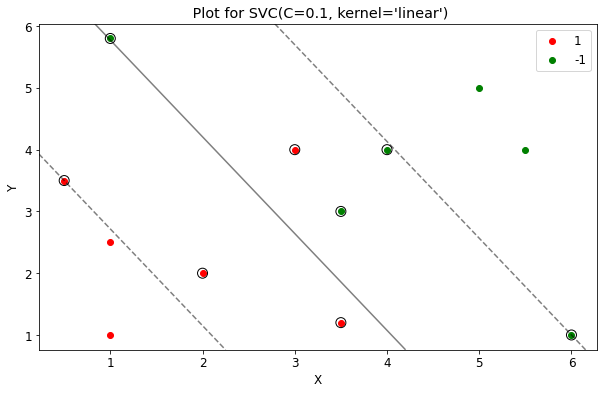

In [300]:
clf=SVC(kernel='linear',C=0.1)
clf.fit(X.values,y.values.ravel())

plot_data_2(' Plot for ' + str(clf))
plot_support_vector(clf)

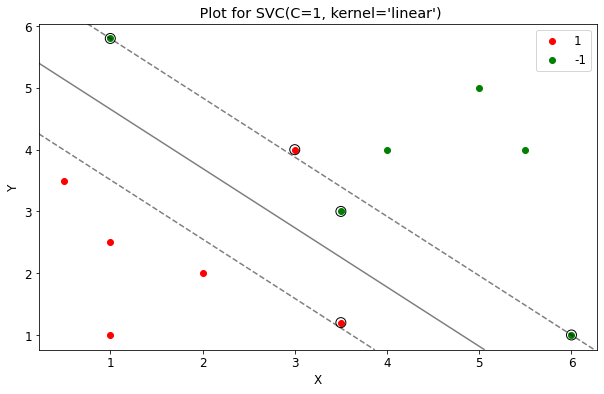

In [301]:
clf=SVC(kernel='linear',C=1)
clf.fit(X.values,y.values.ravel())

plot_data_2(' Plot for ' + str(clf))
plot_support_vector(clf)

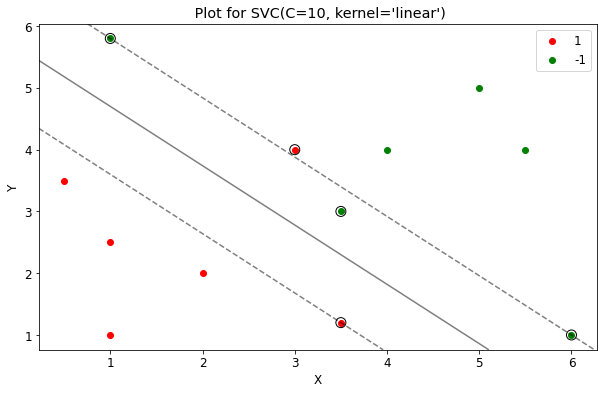

In [302]:
clf=SVC(kernel='linear',C=10)
clf.fit(X.values,y.values.ravel())

plot_data_2(' Plot for ' + str(clf))
plot_support_vector(clf)

### Inference:

- We can notice reduction in margins as the cost increase for linear kernel

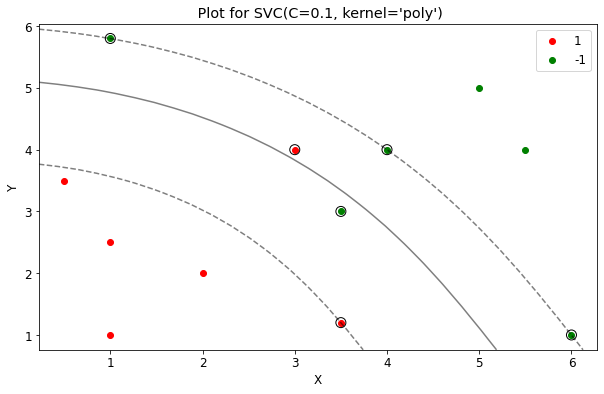

In [303]:
clf=SVC(kernel='poly',C=0.1)
clf.fit(X.values,y.values.ravel())

plot_data_2(' Plot for ' + str(clf))
plot_support_vector(clf)

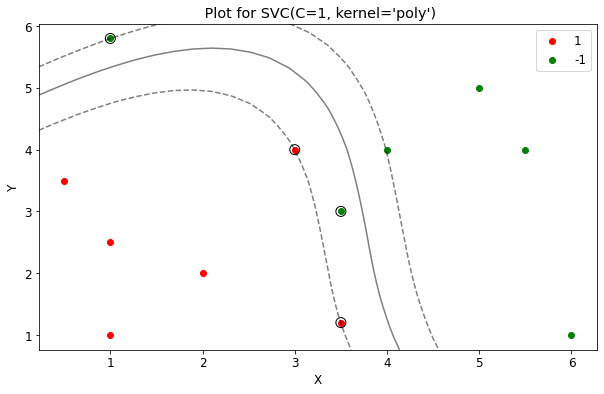

In [304]:
clf=SVC(kernel='poly',C=1)
clf.fit(X.values,y.values.ravel())

plot_data_2(' Plot for ' + str(clf))
plot_support_vector(clf)

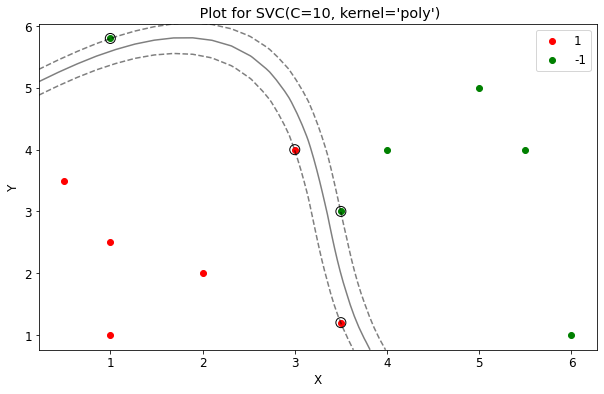

In [305]:
clf=SVC(kernel='poly',C=10)
clf.fit(X.values,y.values.ravel())

plot_data_2(' Plot for ' + str(clf))
plot_support_vector(clf)

### Inference:

- In polynomial kernel, as the cost is increase we can see better fit of the model. The margins reduce and the shape of hyperplane adjusts to cover major data points, however this might result in overfitting

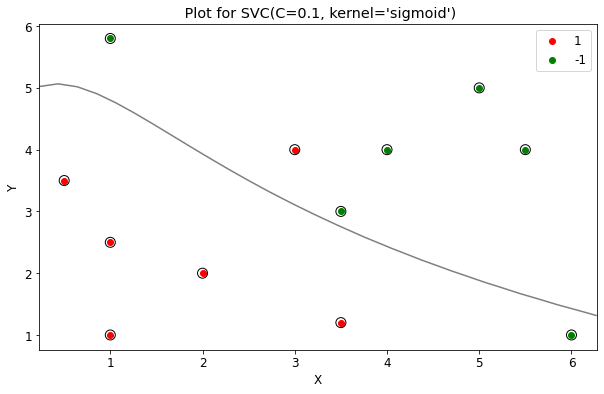

In [306]:
clf=SVC(kernel='sigmoid',C=0.1)
clf.fit(X.values,y.values.ravel())

plot_data_2(' Plot for ' + str(clf))
plot_support_vector(clf)

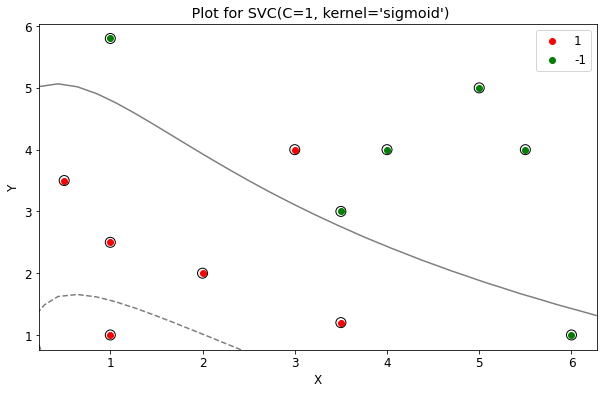

In [307]:
clf=SVC(kernel='sigmoid',C=1)
clf.fit(X.values,y.values.ravel())

plot_data_2(' Plot for ' + str(clf))
plot_support_vector(clf)

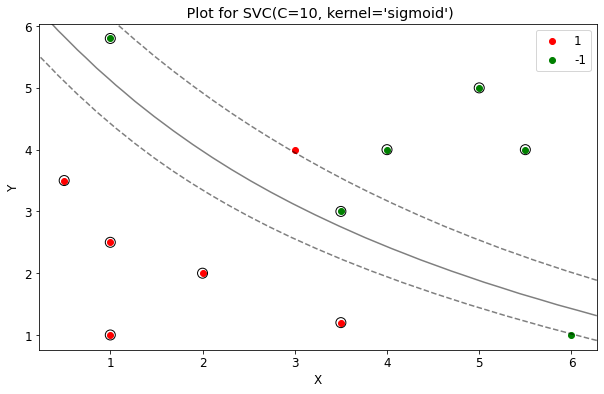

In [308]:
clf=SVC(kernel='sigmoid',C=10)
clf.fit(X.values,y.values.ravel())

plot_data_2(' Plot for ' + str(clf))
plot_support_vector(clf)

### Inference:

- In sigmoid kernel, we can observe difference in hyperplane pattern with increased cost <br>
- The model is trying to fit as much data points possible, the shape changes when the cost is 10